<a href="https://colab.research.google.com/github/esha-pala/Multi-Traffic-Scene-Perception-Based-On-Supervised-Learning/blob/main/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
local_zip='/content/input_traffic image data.zip'

In [ ]:
zip_ref=zipfile.ZipFile(local_zip,'r')

In [ ]:
zip_ref.extractall('/content/input_traffic image data')

In [ ]:
local_zip='/content/input_traffic image data.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/input_traffic image data')

In [ ]:
os.listdir('/content/input_traffic image data')

['Non acciental area', 'traffic', 'Foggy']

In [ ]:
train_na_dir = os.path.join('/content/input_traffic image data/Non acciental area')

In [ ]:
train_tr_dir = os.path.join('/content/input_traffic image data/traffic')

In [ ]:
train_fo_dir = os.path.join('/content/input_traffic image data/traffic')

In [ ]:
train_na_names = os.listdir(train_na_dir)
print(train_na_names[:10])

['images9.png', 'images13.png', 's1.jpg', 'images5.png', 'r8.jpg', 'n2.jpg', 'images6.png', 'r1.jpg', 'images4.png', 's5.jpg']


In [ ]:
train_tr_names = os.listdir(train_tr_dir)
print(train_tr_names[:10])

['images9.png', 'images13.png', 'download1.png', 'images5.png', 'images15.png', 'images6.png', 'bk1.jpg', 'images4.png', 'images17.png', 't5.png']


In [ ]:
train_fo_names = os.listdir(train_fo_dir)
print(train_fo_names[:10])

['images9.png', 'images13.png', 'download1.png', 'images5.png', 'images15.png', 'images6.png', 'bk1.jpg', 'images4.png', 'images17.png', 't5.png']


In [ ]:
print('total training non acciental images:', len(os.listdir(train_na_dir)))
print('total training traffic images:', len(os.listdir(train_tr_dir)))
print('total training foggy images:', len(os.listdir(train_fo_dir)))

total training non acciental images: 36
total training traffic images: 38
total training foggy images: 38


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
nrows = 4
ncols = 4

In [ ]:
pic_index = 0

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

<Figure size 1152x1152 with 0 Axes>

In [ ]:
pic_index += 8
next_na_pix = [os.path.join(train_na_dir, fname) 
                for fname in train_na_names[pic_index-8:pic_index]]
next_tr_pix = [os.path.join(train_tr_dir, fname) 
                for fname in train_tr_names[pic_index-8:pic_index]]
next_fo_pix = [os.path.join(train_fo_dir, fname) 
                for fname in train_fo_names[pic_index-8:pic_index]]

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (300,300,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [ ]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 298, 298, 28)      784       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 28)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 621628)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               79568512  
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 79,570,586
Trainable params: 79,570,586
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/input_traffic image data',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 109 images belonging to 3 classes.


In [ ]:
history=model.fit_generator(
      train_generator,
      steps_per_epoch=1,  
      epochs=40,
      verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
1/1 [==============================] - 7s 7s/step - loss: 1.7557 - accuracy: 0.8899
Epoch 2/5
1/1 [==============================] - 8s 8s/step - loss: 1.4106 - accuracy: 0.9083
Epoch 3/5
1/1 [==============================] - 10s 10s/step - loss: 1.1540 - accuracy: 0.9266
Epoch 4/5
1/1 [==============================] - 9s 9s/step - loss: 0.9880 - accuracy: 0.9266
Epoch 5/5
1/1 [==============================] - 6s 6s/step - loss: 0.9210 - accuracy: 0.9083


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


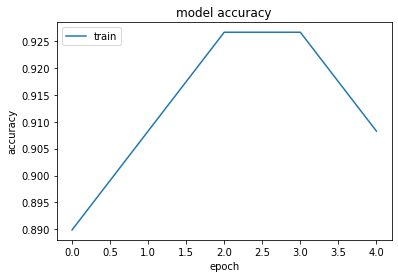

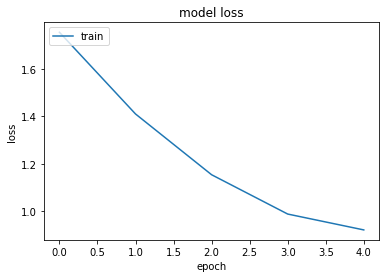

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
pip install gtts

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from gtts import gTTS
from IPython.display import Audio
from tensorflow.python.keras import backend as K

Saving download.png to download (2).png
0
download.png is foggy


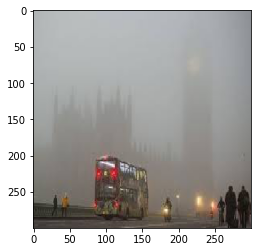

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  plt.imshow(img,cmap='Greys')
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  pred = model.predict(images)
  print(pred.argmax())
  if pred.argmax()==0:
    print(fn + " is foggy")
    tts = gTTS('Image is Foggy') #Provide the string to convert to speech
    tts.save('1.wav') #save the string converted to speech as a .wav file
    sound_file = '1.wav'
    Audio(sound_file, autoplay=True)
  elif pred.argmax()==1:
    print(fn + " is Non Accidental")
    tts = gTTS('Image is Non Accidental') #Provide the string to convert to speech
    tts.save('1.wav') #save the string converted to speech as a .wav file
    sound_file = '1.wav'
    Audio(sound_file, autoplay=True)
  else:
    print(fn + " is traffic")
    tts = gTTS('Image is traffic') #Provide the string to convert to speech
    tts.save('1.wav') #save the string converted to speech as a .wav file
    sound_file = '1.wav'
    Audio(sound_file, autoplay=True)

Audio(sound_file, autoplay=True)
  
